In [1]:
from os.path import exists
import matplotlib.pyplot as plt
import numpy as np

#my_cmap=plt.cm.viridis
#my_cmap=plt.cm.plasma
my_cmap=plt.cm.cividis

In [2]:
def getG2sToTime(filename,M,_maxTime):
    maxTime = 0
    Nis = []
    G2s = []
    G2ss = []
    if exists(filename):
        file = open(filename)
        lines = file.read().splitlines()
        out = []
        
        for line in lines:
            if line != "":
                cells = line.split()
                if len(cells)>0 and cells[0]=="rtime=":
                    maxTime = float(cells[9])
                    if maxTime > _maxTime:
                        break
                    Nis = []
                    G2s = []
                    
                    
                    for index in range(cells.index("Ni=")+1, len(cells)):
                        if "=" in cells[index]:
                            break
                        Nis.append(float(cells[index])) 
                        
                    for index in range(cells.index("NcNi=")+1, len(cells)):
                        if "=" in cells[index]:
                            break
                        G2s.append(float(cells[index]))
                    G2s[int(len(G2s)/2)] -= Nis[int(len(G2s)/2)]
                    if len(G2s)==M:
                        G2ss.append(G2s)
                    else:
                        G2ss.append([0]*M)
        return G2ss, maxTime
    else:
        print("Cannot open file: "+filename)

In [3]:
U,qU,Unn,M,N,τ,cutoff=40,-40,-1.97,101,4,0.01,"1e-8"
fileName = "./"+str(N)+"_"+str(M)+"_0_"+str(U)+"_"+str(Unn)+"_0_4_30_1000_1e-10_TDVP2_0.01_2000_"+str(cutoff)+"_quench"+str(qU)+".rtev.txt"
dataG2sN4,maxTimeN4 = getG2sToTime(fileName,M,_maxTime=10.5)
dataG2sN4 = [[j/4/4 for j in i] for i in dataG2sN4]

U,qU,Unn,M,N,τ,cutoff=40,-40,-1.97,101,6,0.01,"1e-8"
fileName = "./"+str(N)+"_"+str(M)+"_0_"+str(U)+"_"+str(Unn)+"_0_4_30_1000_1e-10_TDVP2_0.01_2000_"+str(cutoff)+"_quench"+str(qU)+".rtev.txt"
dataG2sN6,maxTimeN6 = getG2sToTime(fileName,M,_maxTime=10.5)
dataG2sN6 = [[j/6/6 for j in i] for i in dataG2sN6]

U,qU,Unn,M,N,τ,cutoff=40,-40,-1.97,101,8,0.01,"1e-7"
fileName = "./"+str(N)+"_"+str(M)+"_0_"+str(U)+"_"+str(Unn)+"_0_4_30_1000_1e-10_TDVP2_0.01_2000_"+str(cutoff)+"_quench"+str(qU)+".rtev.txt"
dataG2sN8,maxTimeN8 = getG2sToTime(fileName,M,_maxTime=10.5) 
dataG2sN8 = [[j/8/8 for j in i] for i in dataG2sN8]

minG2s = np.min([np.min(dataG2sN4),np.min(dataG2sN6),np.min(dataG2sN8)])
maxG2s = np.max([np.max(dataG2sN4),np.max(dataG2sN6),np.max(dataG2sN8)])

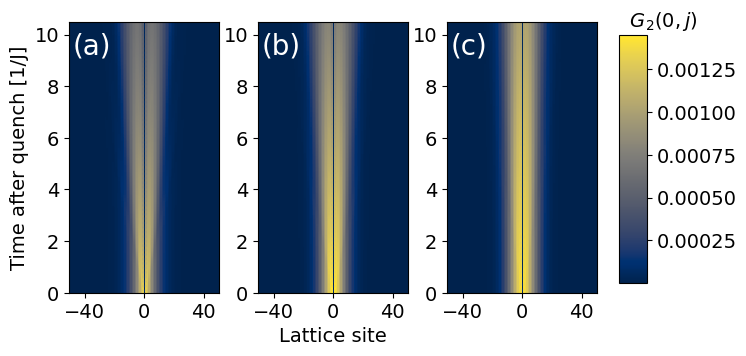

In [4]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(18/2.54, 9/2.54)

im0 = ax[0].imshow(dataG2sN4,interpolation='none',vmin=minG2s,vmax=maxG2s,cmap=my_cmap,origin='lower',aspect="auto",extent=[-int(M/2)-0.5,int(M/2)+0.5,0,10.5])  
im1 = ax[1].imshow(dataG2sN6,interpolation='none',vmin=minG2s,vmax=maxG2s,cmap=my_cmap,origin='lower',aspect="auto",extent=[-int(M/2)-0.5,int(M/2)+0.5,0,10.5])  
im2 = ax[2].imshow(dataG2sN8,interpolation='none',vmin=minG2s,vmax=maxG2s,cmap=my_cmap,origin='lower',aspect="auto",extent=[-int(M/2)-0.5,int(M/2)+0.5,0,10.5])  

ax[0].text(-M/2*0.95,37*10.5/42,"(a)",fontsize=20,c='white')
ax[1].text(-M/2*0.95,37*10.5/42,"(b)",fontsize=20,c='white')
ax[2].text(-M/2*0.95,37*10.5/42,"(c)",fontsize=20,c='white')

ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[2].tick_params(axis='both', which='major', labelsize=12)

ax[0].set_xticks([-40,0,40])
ax[1].set_xticks([-40,0,40])
ax[2].set_xticks([-40,0,40])

ax[0].set_yticks([0,2,4,6,8,10])
ax[1].set_yticks([0,2,4,6,8,10])
ax[2].set_yticks([0,2,4,6,8,10])

ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=14)

ax[1].set_xlabel("Lattice site",fontsize=14)
ax[0].set_ylabel("Time after quench [1/J]",fontsize=14)

plt.tight_layout(w_pad=0.8)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.22, 0.04, 0.7])
cbar = fig.colorbar(im2, cax=cbar_ax)
cbar.ax.tick_params(axis='both', which='major', labelsize=14)
cbar.ax.set_title("          $G_2(0,j)$",fontsize=14)

plt.savefig("./Tev_DMRG_G2sOverN.pdf",format='pdf',dpi=300, transparent=True,bbox_inches = "tight")
plt.show()